In [1]:
import mlrose
import numpy as np
import timeit
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve

%matplotlib inline

## Neural Network Weights

In [2]:
def prepare_pd_df(data, test_size):
    
    # Split data into training and test sets
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Normalize feature data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # One hot encode target values
    one_hot = OneHotEncoder(categories='auto')
    y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
    y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

    return X_train_scaled, X_test_scaled, y_train_hot, y_test_hot

In [3]:
# def prepare_pd_df(data):
    
#     # Split data 
#     X, y = data.data, data.target
    
#     # Normalize feature data
#     scaler = MinMaxScaler()
#     X_scaled = scaler.fit_transform(X)
    
#     # One hot encode target values
#     one_hot = OneHotEncoder(categories='auto')
#     y_hot = one_hot.fit_transform(y.reshape(-1, 1)).todense()

#     return X_scaled, y_hot

In [4]:
def get_train_test_score(model, X_train, X_test, y_train, y_test):

    y_train_pred = model.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)

    return y_train_accuracy, y_test_accuracy

In [5]:
# def get_train_test_score(model, X, y):

#     y_pred = model.predict(X)
#     y_score = accuracy_score(y, y_pred)

#     return y_score

In [14]:
def opt_validation_curve(estimator, data, param_dict, param_name, param_range, test_size=0.2):
    X_train, X_test, y_train, y_test = prepare_pd_df(data, test_size)
    train_scores, test_scores = [], []
    train_times, pred_times = [], []
    for param_value in param_range:
        param_dict[param_name] = param_value
        model = estimator(**param_dict)
        start_train = timeit.default_timer()
        model.fit(X_train, y_train)
        end_train = timeit.default_timer()
        y_train_score, y_test_score = get_train_test_score(model, X_train, X_test, y_train, y_test)
        end_pred = timeit.default_timer()
        
        train_times.append(end_train - start_train)
        pred_times.append(end_pred - end_train)
        train_scores.append(y_train_score)
        test_scores.append(y_test_score)
    return train_scores, test_scores, train_times, pred_times

In [15]:
# def opt_validation_curve(estimator, data, param_dict, param_name, param_range, scoring='accuracy'):
#     X, y = prepare_pd_df(data)
#     scores = []
#     train_times, pred_times = [], []
#     for param_value in param_range:
#         param_dict[param_name] = param_value
#         model = estimator(**param_dict)
#         start_train = timeit.default_timer()
#         model.fit(X, y)
#         end_train = timeit.default_timer()
#         score = get_train_test_score(model, X, y)
#         end_pred = timeit.default_timer()
        
#         train_times.append(end_train - start_train)
#         pred_times.append(end_pred - end_train)
#         scores.append(score)
#     return scores, train_times, pred_times

In [30]:
def plot_nn_validation_curve(data, algo, param_name, param_list, y_min, y_max, x_label_override=False):
    scorer = 'accuracy'
    estimator = mlrose.NeuralNetwork
    param_dict = {'hidden_nodes':[16],
                  'algorithm':algo, 
                  'learning_rate':0.1,
                  'early_stopping':True, 
                  'clip_max':5, 
                  'max_attempts':100}

    train_scores, test_scores, train_times, pred_times = opt_validation_curve(estimator, data, param_dict, 
                                                                              param_name, param_range, 
                                                                              test_size=0.2)
    if x_label_override:
        param_list_str = x_label_override
    else:
        param_list_str = [str(param) for param in param_list]
    plt.grid()
    plt.plot(param_list_str, train_scores, 'o-', color="r", label="Train score")
    plt.plot(param_list_str, test_scores, 'o-', color="g", label="Test score")
    plt.legend(loc="best")
    plt.ylim(y_min, y_max)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    scores = pd.DataFrame({'train_scores': train_scores,
                           'test_scores': test_scores,
                           'train_times': train_times})
    return {'plot':plt, 'scores':scores}

In [23]:
# def plot_nn_validation_curve(data, algo, param_name, param_list, y_min, y_max):
#     scorer = 'accuracy'
#     estimator = mlrose.NeuralNetwork
#     param_dict = {'hidden_nodes':[64],
#                   'algorithm':algo, 
#                   'learning_rate':0.1,
#                   'early_stopping':True, 
#                   'clip_max':5, 
#                   'max_attempts':100}

#     scores, train_times, pred_times = opt_validation_curve(estimator, data, param_dict, 
#                                                            param_name, param_range, 
#                                                            scoring=scorer)
#     param_list_str = [str(param) for param in param_list]
#     plt.grid()
#     plt.plot(param_list_str, train_scores, 'o-', color="r", label="seed 42")
#     plt.plot(param_list_str, test_scores, 'o-', color="g", label="seed 2")
#     plt.legend(loc="best")
#     plt.ylim(y_min, y_max)
#     plt.xlabel(param_name)
#     plt.ylabel("Score")
#     scores = pd.DataFrame({'train_scores': train_scores,
#                            'test_scores': test_scores,
#                            'train_times': train_times})
#     return {'plot':plt, 'scores':scores}

In [24]:
data = load_breast_cancer()
data.target[data.target ==0].shape

(212,)

In [25]:
opt_algo = ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'gradient_descent']

{'plot': <module 'matplotlib.pyplot' from '/Users/hanshan/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py'>,
 'scores':    train_scores  test_scores  train_times
 0      0.668132     0.745614     0.318029
 1      0.432967     0.421053     0.289222
 2      0.241758     0.228070     0.316748}

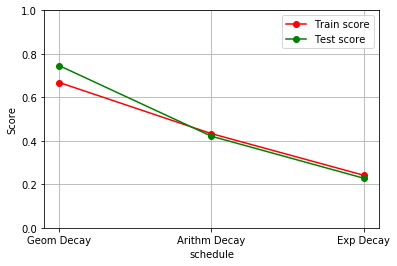

In [26]:
np.random.seed(2)

algo = opt_algo[1]
param_name = 'schedule'
param_range = [mlrose.GeomDecay(), mlrose.ArithDecay(), mlrose.ExpDecay()]
x_label_override = ['Geom Decay', 'Arithm Decay', 'Exp Decay']
plot_nn_validation_curve(data, algo, param_name, param_range, 0, 1, x_label_override=x_label_override)

{'plot': <module 'matplotlib.pyplot' from '/Users/hanshan/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py'>,
 'scores':    train_scores  test_scores  train_times
 0      0.841758     0.754386    24.665762
 1      0.896703     0.903509    47.840786
 2      0.934066     0.912281    48.652178
 3      0.764835     0.833333    30.558609
 4      0.945055     0.921053    40.835206}

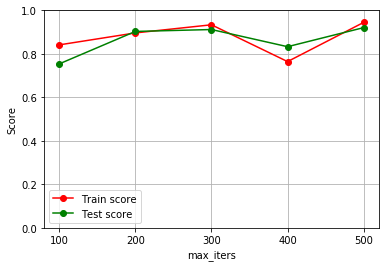

In [32]:
np.random.seed(2)

algo = opt_algo[2]
param_name = 'max_iters'
param_range = [100, 200, 300, 400, 500]
plot_nn_validation_curve(data, algo, param_name, param_range, 0, 1)

{'plot': <module 'matplotlib.pyplot' from '/Users/hanshan/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py'>,
 'scores':    train_scores  test_scores  train_times
 0      0.839560     0.842105    25.089826
 1      0.898901     0.868421    26.613371
 2      0.857143     0.912281    28.650257
 3      0.938462     0.938596    27.285039
 4      0.936264     0.921053    33.073061}

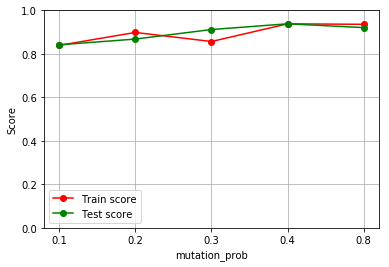

In [35]:
np.random.seed(42)

algo = opt_algo[2]
param_name = 'mutation_prob'
param_range = [0.1, 0.2, 0.3, 0.4, 0.8]
plot_nn_validation_curve(data, algo, param_name, param_range, 0, 1)

In [ ]:
np.random.seed(42)

algo = opt_algo[2]
param_name = 'pop_size'
param_range = [100, 200, 300, 400, 500]
plot_nn_validation_curve(data, algo, param_name, param_range, 0, 1)

{'plot': <module 'matplotlib.pyplot' from '/Users/hanshan/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py'>,
 'scores':    train_scores  test_scores  train_times
 0      0.221106     0.198830     0.125088
 1      0.374372     0.362573     0.101454
 2      0.625628     0.625731     0.116767
 3      0.648241     0.590643     0.120171
 4      0.374372     0.368421     0.136794}

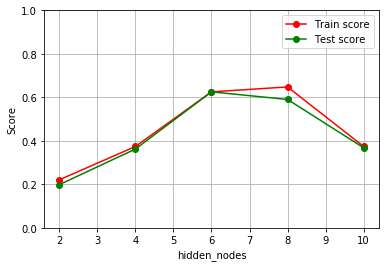

In [258]:
np.random.seed(42)

algo = opt_algo[0]
param_name = 'hidden_nodes'
param_range = [[2], [4], [6], [8], [10]]
plot_nn_validation_curve(data, algo, param_name, param_range, 0, 1)

In [166]:
# Load the dataset
data = load_breast_cancer()

In [171]:
param_dict = {'hidden_nodes':[2], 'activation':'relu', 
              'algorithm':'random_hill_climb', 'bias':True, 
              'is_classifier':True, 'learning_rate':0.0001,
              'early_stopping':True, 'clip_max':5, 'max_attempts':100}

estimator = mlrose.NeuralNetwork
param_name = 'max_iters'
param_range = [100, 200, 300, 400]
scores, train_times, predict_times = opt_validation_curve(estimator, data, param_dict, param_name, param_range)
print(scores)
print(train_times)
print(predict_times)

[[0.3743718592964824, 0.3684210526315789], [0.3743718592964824, 0.3684210526315789], [0.3743718592964824, 0.3684210526315789], [0.3743718592964824, 0.3684210526315789]]
[0.1515254250007274, 0.27089970400083985, 0.29264486800093437, 0.4163183280015801]
[0.001413489999322337, 0.0016930929996306077, 0.0014191829995979788, 0.0018859219999285415]


In [98]:
X_train_scaled, X_test_scaled, y_train_hot, y_test_hot = prepare_pd_df(data)

In [99]:
# Initialize neural network object and fit object - attempt 1

np.random.seed(3)

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2, 2], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100)

%time nn_model1.fit(X_train_scaled, y_train_hot)

CPU times: user 907 ms, sys: 6.62 ms, total: 913 ms
Wall time: 922 ms


In [101]:
%time get_train_test_score(nn_model1, X_train_scaled, X_test_scaled, y_train_hot, y_test_hot)

CPU times: user 4.42 ms, sys: 1.88 ms, total: 6.3 ms
Wall time: 5.34 ms


(0.29523809523809524, 0.4222222222222222)

In [102]:
# Initialize neural network object and fit object - attempt 2

np.random.seed(3)

nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100)

%time nn_model2.fit(X_train_scaled, y_train_hot)

CPU times: user 1.44 s, sys: 15.3 ms, total: 1.45 s
Wall time: 1.48 s


In [106]:
%time get_train_test_score(nn_model2, X_train_scaled, X_test_scaled, y_train_hot, y_test_hot)

CPU times: user 3.17 ms, sys: 1.24 ms, total: 4.41 ms
Wall time: 3.25 ms


(0.5142857142857142, 0.4666666666666667)

In [41]:
# Initialize neural network object and fit object - attempt 2

np.random.seed(3)

nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                 algorithm = 'genetic_alg', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100) 

%time nn_model3.fit(X_train_scaled, y_train_hot)

CPU times: user 23.6 s, sys: 230 ms, total: 23.8 s
Wall time: 25.4 s


In [42]:
%time get_train_test_score(nn_mode13, X_train_scaled, X_test_scaled, y_train_hot, y_test_hot)

0.9083333333333333 0.9
CPU times: user 4.32 ms, sys: 1.43 ms, total: 5.75 ms
Wall time: 9.6 ms


## Three Optimization Problem Domains

In [163]:
# Each plot will have one coloured line for each algorithm
# Plot of fitness score vs iterations
# Plot of run time vs iterations

In [44]:
def get_discrete_opt_problem_list(fitness, length_list, random_seed=1):
    scores_sa, scores_ga, scores_mimic = [], [], []
    times_sa, times_ga, times_mimic = [], [], []
    for length in length_list:
        init_state = np.random.choice([0, 1], length)
        problem_d = {
            'length' : length,
            'fitness_fn' : fitness,
            'maximize' : True,
            'max_val' : 2
        }
        problem = mlrose.DiscreteOpt(**problem_d)
        np.random.seed(random_seed)
        start_t = timeit.default_timer()
        best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem)
        sa_t = timeit.default_timer()
        best_state_ga, best_fitness_ga = mlrose.genetic_alg(problem)
        ga_t = timeit.default_timer()
        best_state_mimic, best_fitness_mimic = mlrose.mimic(problem)
        mimic_t = timeit.default_timer()
        
        times_sa.append(sa_t - start_t)
        times_ga.append(ga_t - sa_t)
        times_mimic.append(mimic_t - ga_t)
        
        scores_sa.append(best_fitness_sa)
        scores_ga.append(best_fitness_ga)
        scores_mimic.append(best_fitness_mimic)
    return length_list, [times_sa, times_ga, times_mimic], [scores_sa, scores_ga, scores_mimic]

def plot_opt_curve(y_label, length_list, sa, ga, mimic):
    length_list_str = [str(i) for i in length_list]
    plt.grid()
    plt.plot(length_list_str, sa, 'o-', color="r", label="SA")
    plt.plot(length_list_str, ga, 'o-', color="g", label="GA")
    plt.plot(length_list_str, mimic, 'o-', color="y", label="MIMIC")
    plt.legend(loc="best")
    # plt.ylim(y_min, y_max)
    plt.xlabel('Length of Bits')
    plt.ylabel(y_label)
    return plt

### Problem 1 - One Max (Bit String)

In [160]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.OneMax()
# Define optimization problem object
problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness, maximize=True, max_val=2)
# Solve using simulated annealing - attempt 1
np.random.seed(1)
init_state = np.array([0, 0, 0, 1, 0, 1, 0, 1])
best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts = 10, 
                                                      max_iters = 1000, init_state = init_state)

In [161]:
print(best_state)
print(best_fitness)

[1 1 0 1 1 1 1 1]
7.0


In [347]:
fitness = mlrose.OneMax()
x_range = range(10, 110, 10)
length_list, times, scores = get_discrete_opt_problem_list(fitness, x_range)
times_sa, times_ga, times_mimic = times
scores_sa, scores_ga, scores_mimic = scores

<module 'matplotlib.pyplot' from '/Users/hanshan/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

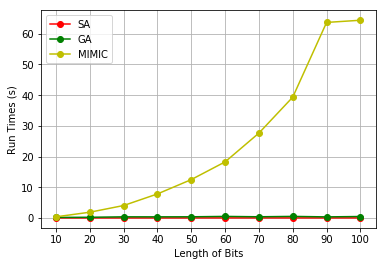

In [348]:
plot_opt_curve("Run Times (s)", length_list, times_sa, times_ga, times_mimic)

<module 'matplotlib.pyplot' from '/Users/hanshan/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

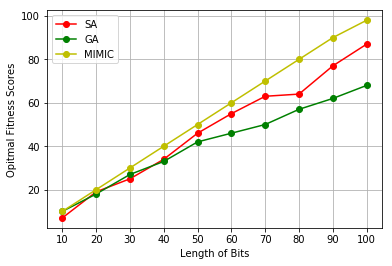

In [349]:
plot_opt_curve("Opitmal Fitness Scores", length_list, scores_sa, scores_ga, scores_mimic)

### Problem 2 - Four Peaks (Bit String)

In [143]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FourPeaks()
# Define optimization problem object
problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness, maximize=True, max_val=2)
# Solve using simulated annealing - attempt 1
np.random.seed(1)
init_state = np.array([0, 1, 0, 1, 0, 1, 0, 1])
best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts = 10, 
                                                      max_iters = 1000, init_state = init_state)

In [144]:
best_fitness

14.0

In [145]:
best_state

array([1, 1, 1, 1, 1, 1, 0, 0])

In [403]:
fitness = mlrose.FourPeaks()
x_range = range(10, 110, 10)
length_list, times, scores = get_discrete_opt_problem_list(fitness, x_range)
times_sa, times_ga, times_mimic = times
scores_sa, scores_ga, scores_mimic = scores

<module 'matplotlib.pyplot' from '/Users/hanshan/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

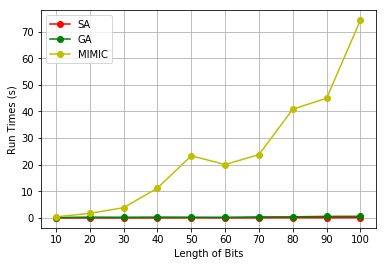

In [404]:
plot_opt_curve("Run Times (s)", length_list, times_sa, times_ga, times_mimic)

<module 'matplotlib.pyplot' from '/Users/hanshan/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

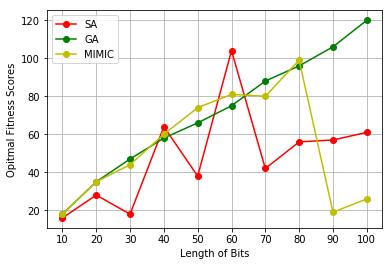

In [405]:
plot_opt_curve("Opitmal Fitness Scores", length_list, scores_sa, scores_ga, scores_mimic)

### Problem 3 - Knapsack (Discrete Space)

In [39]:
np.random.choice(range(1, 16), 8)

array([15, 13,  6,  4, 13,  6, 11, 14])

In [55]:
def get_knapsack_problem_list(length_list, random_seed=1):
    scores_sa, scores_ga, scores_mimic = [], [], []
    times_sa, times_ga, times_mimic = [], [], []
    for length in length_list:
        weights = np.random.choice(range(1, 16), length)
        values = np.random.choice(range(1, 6), length)
        fitness = mlrose.Knapsack(weights, values)
        init_state = np.random.choice([0, 1, 2], length)
        problem_d = {
            'length' : length,
            'fitness_fn' : fitness,
            'maximize' : True,
            'max_val' : 3
        }
        problem = mlrose.DiscreteOpt(**problem_d)
        np.random.seed(random_seed)
        start_t = timeit.default_timer()
        best_state_sa, best_fitness_sa = mlrose.simulated_annealing(problem)
        sa_t = timeit.default_timer()
        best_state_ga, best_fitness_ga = mlrose.genetic_alg(problem)
        ga_t = timeit.default_timer()
        best_state_mimic, best_fitness_mimic = mlrose.mimic(problem)
        mimic_t = timeit.default_timer()
        
        times_sa.append(sa_t - start_t)
        times_ga.append(ga_t - sa_t)
        times_mimic.append(mimic_t - ga_t)
        
        scores_sa.append(best_fitness_sa)
        scores_ga.append(best_fitness_ga)
        scores_mimic.append(best_fitness_mimic)
    return length_list, [times_sa, times_ga, times_mimic], [scores_sa, scores_ga, scores_mimic]

In [48]:
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
state = np.array([1, 0, 2, 1, 0])
fitness.evaluate(state)

11

In [60]:
x_range = range(10, 60, 10)
length_list, times, scores = get_knapsack_problem_list(x_range)
times_sa, times_ga, times_mimic = times
scores_sa, scores_ga, scores_mimic = scores

In [65]:
mlrose

'mlrose'

<module 'matplotlib.pyplot' from '/Users/hanshan/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

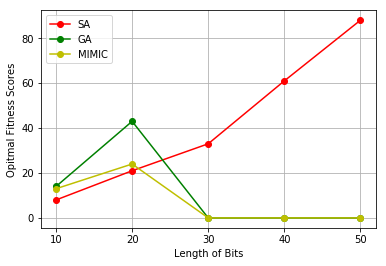

In [61]:
plot_opt_curve("Opitmal Fitness Scores", length_list, scores_sa, scores_ga, scores_mimic)

<module 'matplotlib.pyplot' from '/Users/hanshan/anaconda2/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

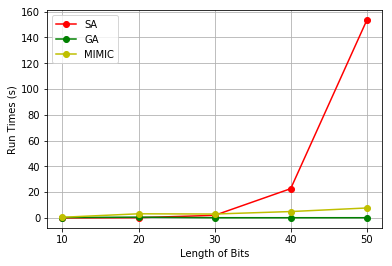

In [62]:
plot_opt_curve("Run Times (s)", length_list, times_sa, times_ga, times_mimic)

### Problem 4 - Flipflop (Bit String)